#This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of
restaurants.


#Now we import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
zomatodata=pd.read_csv("zomato restaurent.csv")

# Import data into data frame

In [3]:
zomatodata.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


# Top 3 data from Data Frame

In [4]:
zomatodata.tail(4)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
country_code_data=pd.read_csv("country code.csv")

In [6]:
country_code_data.head(8)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar


# Here we merge two csv file in one data set

In [7]:
# Merging the zomato dataset at Restaurant Id level and Country data at country code level
df = pd.merge(zomatodata, country_code_data, on = 'Country Code')      # Pandas Merge function to join two dataframes

In [8]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [9]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


# Below are columns name

In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [11]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

# we have three types of data prsent float64,object,int64

In [12]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#describe method provides summary statistics of numerical columns in the DataFrame. It computes various descriptive statistics, including measures of central tendency, dispersion, and shape of the distribution of the data.

In [13]:
df.describe(include="all")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000,9551
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,2,2,2,1,NaN,NaN,6,6,NaN,15
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,No,No,No,No,NaN,NaN,Orange,Average,NaN,India
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN,8652
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748,NaN
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145,NaN
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000,NaN
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000,NaN
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000,NaN


In [14]:
df.shape

(9551, 22)

#Shape of the data frame there are 9551 rows and 22 columns

In [15]:
df.nunique().to_frame("unique values")

,unique values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


#many unique values present in our dataset like Restaurant Id,Restaurent Name,Address etc

In [16]:
df.skew()

Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

#there are many skewness present in Aggregate rating,Latitude,Longitide

In [17]:
df=df.drop_duplicates()
print("rows and columns after droping duplicates:",df.shape)

rows and columns after droping duplicates: (9551, 22)


#No duplicate column is present in our dataset 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#Here we have information about dataset type, memory used,null values ,columns etc

In [19]:
df["Currency"].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

#Here we see that which currency is used frequently,maximun time indian rupee is used 

In [20]:
df["Average Cost for two"].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

#Average Cost for two" column. It provides insight into the typical costs associated with meals for two people in a dataset. By knowing the counts of different cost ranges, one can get an idea of the common price points or ranges within the dataset. This information can be valuable for analysis, such as identifying popular price points, outliers, or trends in consumer spending.

In [21]:
df["Price range"].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [22]:
df["Switch to order menu"].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

#no one switch order menu in our dataset

In [23]:
df["Locality Verbose"].value_counts()

Connaught Place, New Delhi                    122
Rajouri Garden, New Delhi                      99
Shahdara, New Delhi                            87
Defence Colony, New Delhi                      86
Pitampura, New Delhi                           85
                                             ... 
Ramada Gurgaon Central, Sector 44, Gurgaon      1
Sector 5, Gurgaon                               1
Sector 53, Gurgaon                              1
The Claremont, MG Road, Gurgaon                 1
Moda, ��stanbul                                 1
Name: Locality Verbose, Length: 1265, dtype: int64

#It return a new series in descending order .It tell us how many times each unique value appear in the selected column

In [24]:
dfcor=df.corr()
dfcor

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


In [25]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

#null values not present in any of the column

<Axes: >

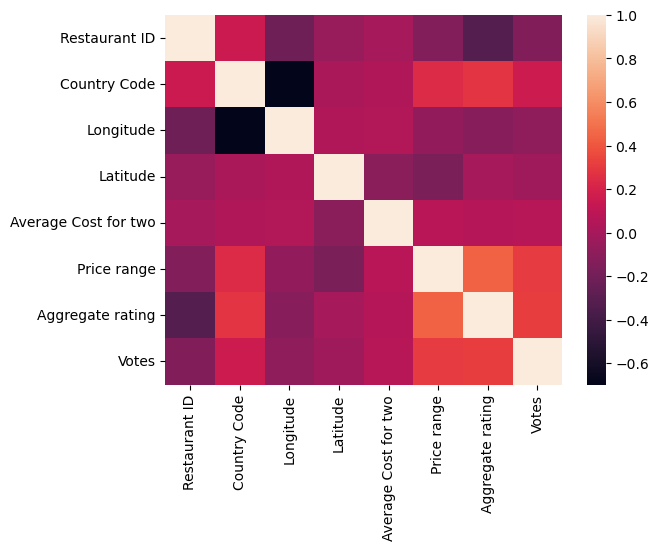

In [26]:
sns.heatmap(dfcor)

<Axes: >

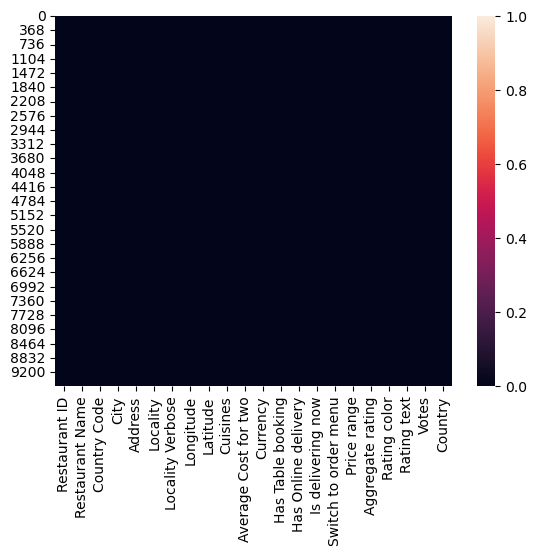

In [27]:
sns.heatmap(df.isnull())

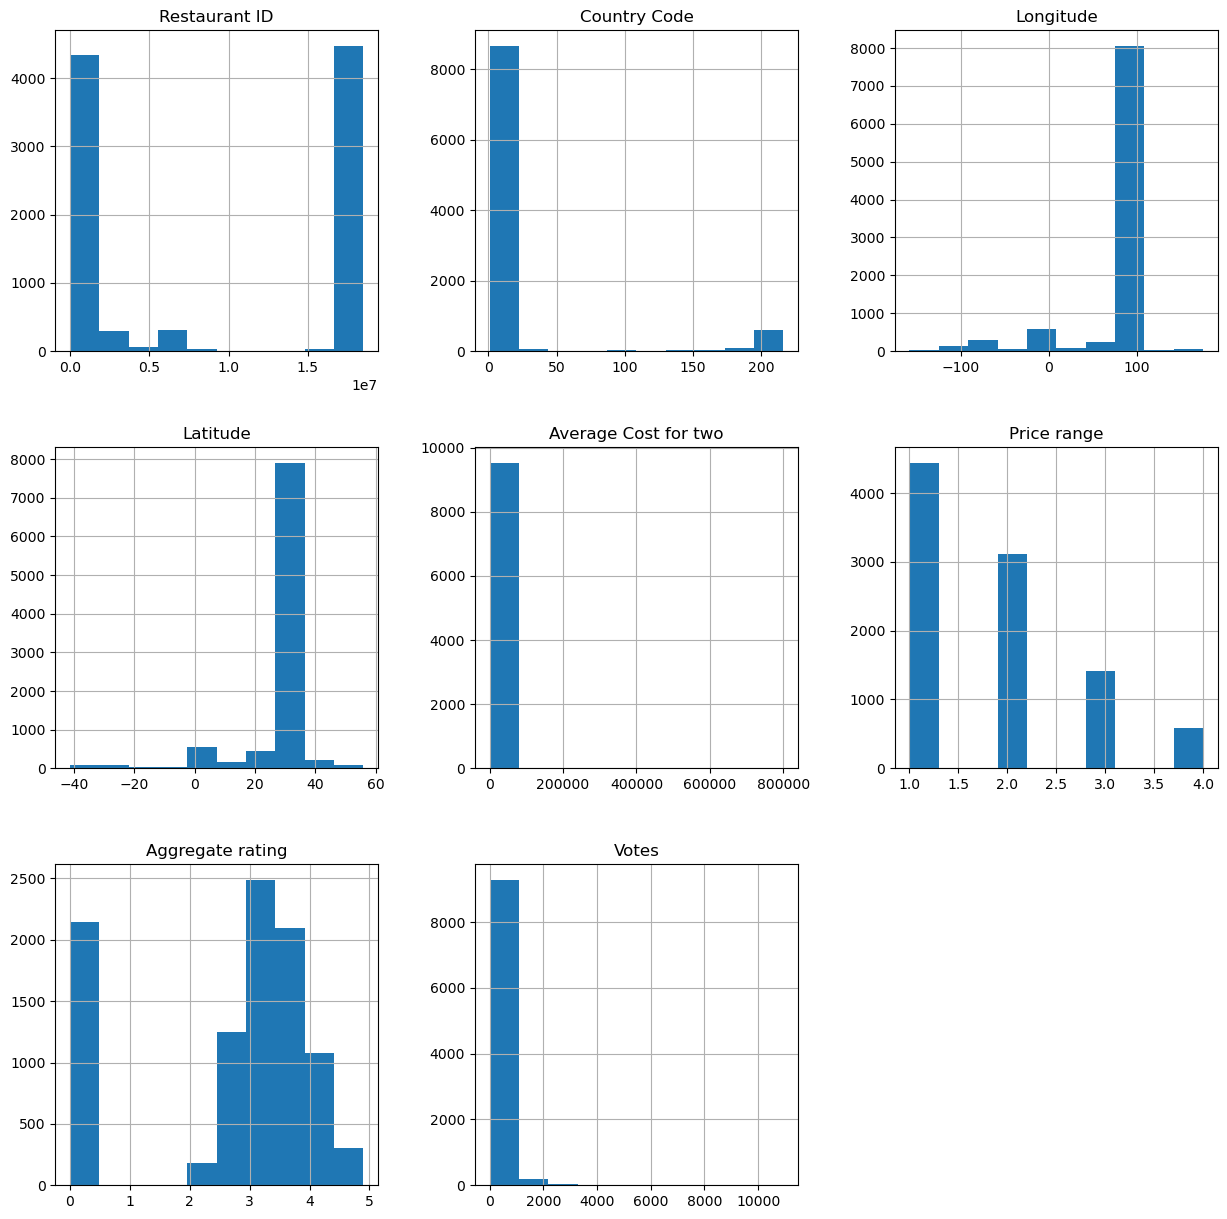

In [28]:
df.hist(figsize=(15,15))
plt.show()

#Histograms are a useful tool for understanding the shape, central tendency, and spread of each numerical variable. By plotting histograms for multiple variables at once, you can quickly compare their distributions and identify any patterns or outliers in the data. This helps in gaining insights into the dataset's characteristics, which can be valuable during exploratory data analysis and feature engineering processes.

Restaurant ID              Axes(0.125,0.712609;0.0824468x0.167391)
Country Code            Axes(0.223936,0.712609;0.0824468x0.167391)
Longitude               Axes(0.322872,0.712609;0.0824468x0.167391)
Latitude                Axes(0.421809,0.712609;0.0824468x0.167391)
Average Cost for two    Axes(0.520745,0.712609;0.0824468x0.167391)
Price range             Axes(0.619681,0.712609;0.0824468x0.167391)
Aggregate rating        Axes(0.718617,0.712609;0.0824468x0.167391)
Votes                   Axes(0.817553,0.712609;0.0824468x0.167391)
dtype: object

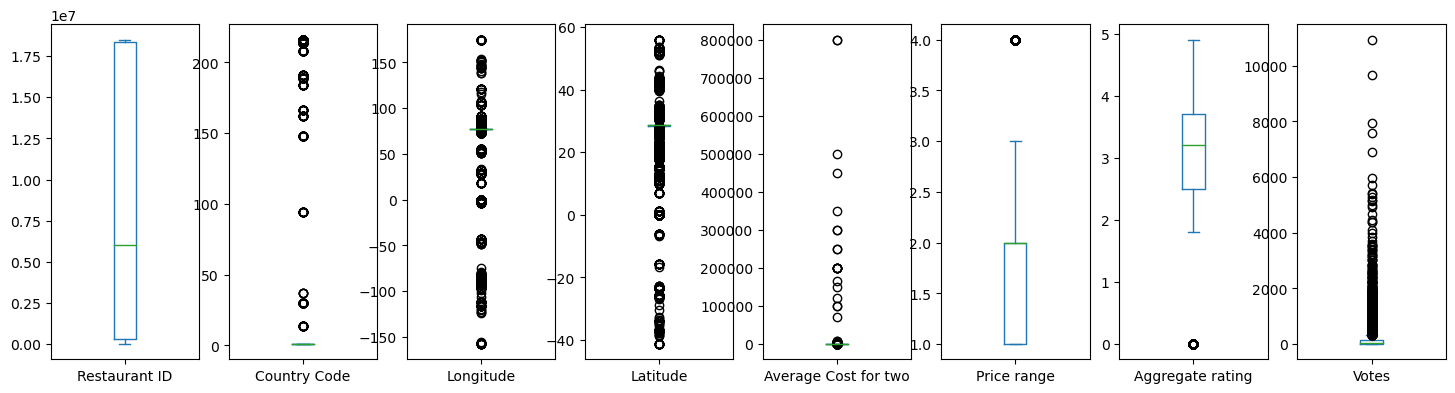

In [29]:
df.plot(kind="box",subplots=True,layout=(4,8),figsize=(18,20))

#Box plots are particularly useful for identifying outliers, comparing the spread of different variables, and understanding the central tendency of the data. By creating box plots for each numerical column and arranging them in a grid, this command allows for a comprehensive visual analysis of the dataset's numerical features

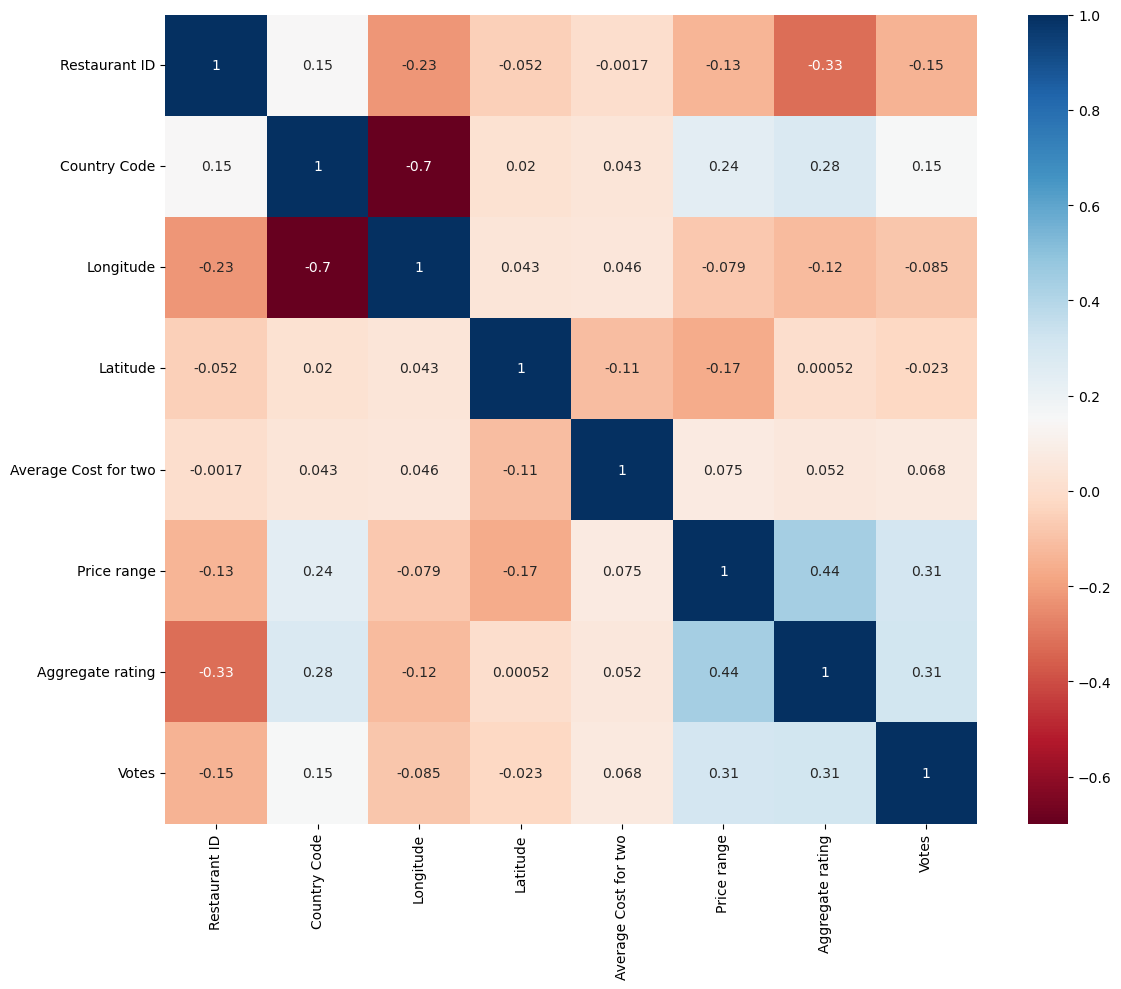

In [30]:
# Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.tight_layout()

#There is high corelation between price range and aggregate rating
#There is high corelation between price range and Votes
#There is high corelation between country code and votes,aggregate rating,price range

<Axes: xlabel='Average Cost for two', ylabel='count'>

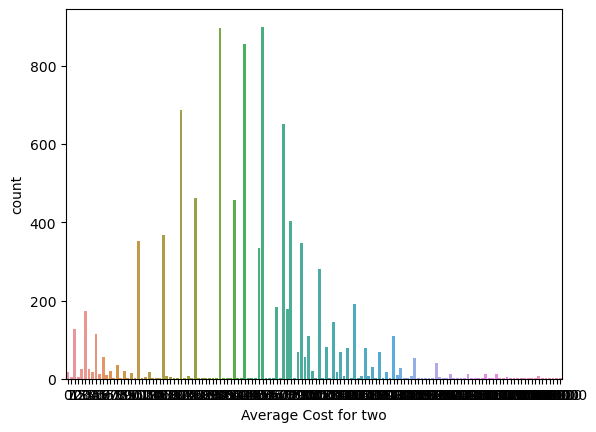

In [31]:
sns.countplot(x="Average Cost for two",data=df)

<Axes: xlabel='Price range', ylabel='count'>

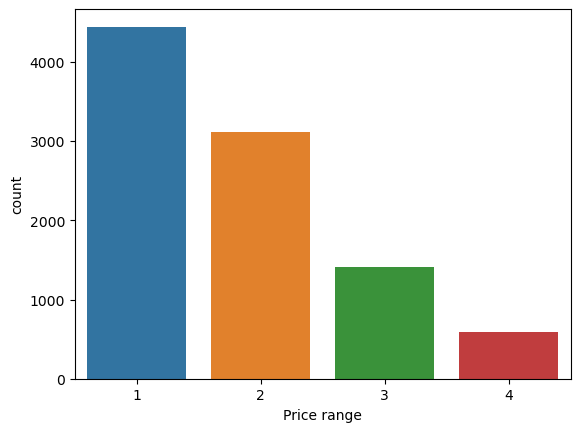

In [32]:
sns.countplot(x="Price range",data=df)

In [ ]:
#In price range 4444 re

In [33]:
categorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="O":
        categorical_cols.append(x)
print(f"object data type columns are:\n",categorical_cols)
    

numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber Data Types Columns are:\n",numerical_cols)

object data type columns are:
 ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']

Number Data Types Columns are:
 ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


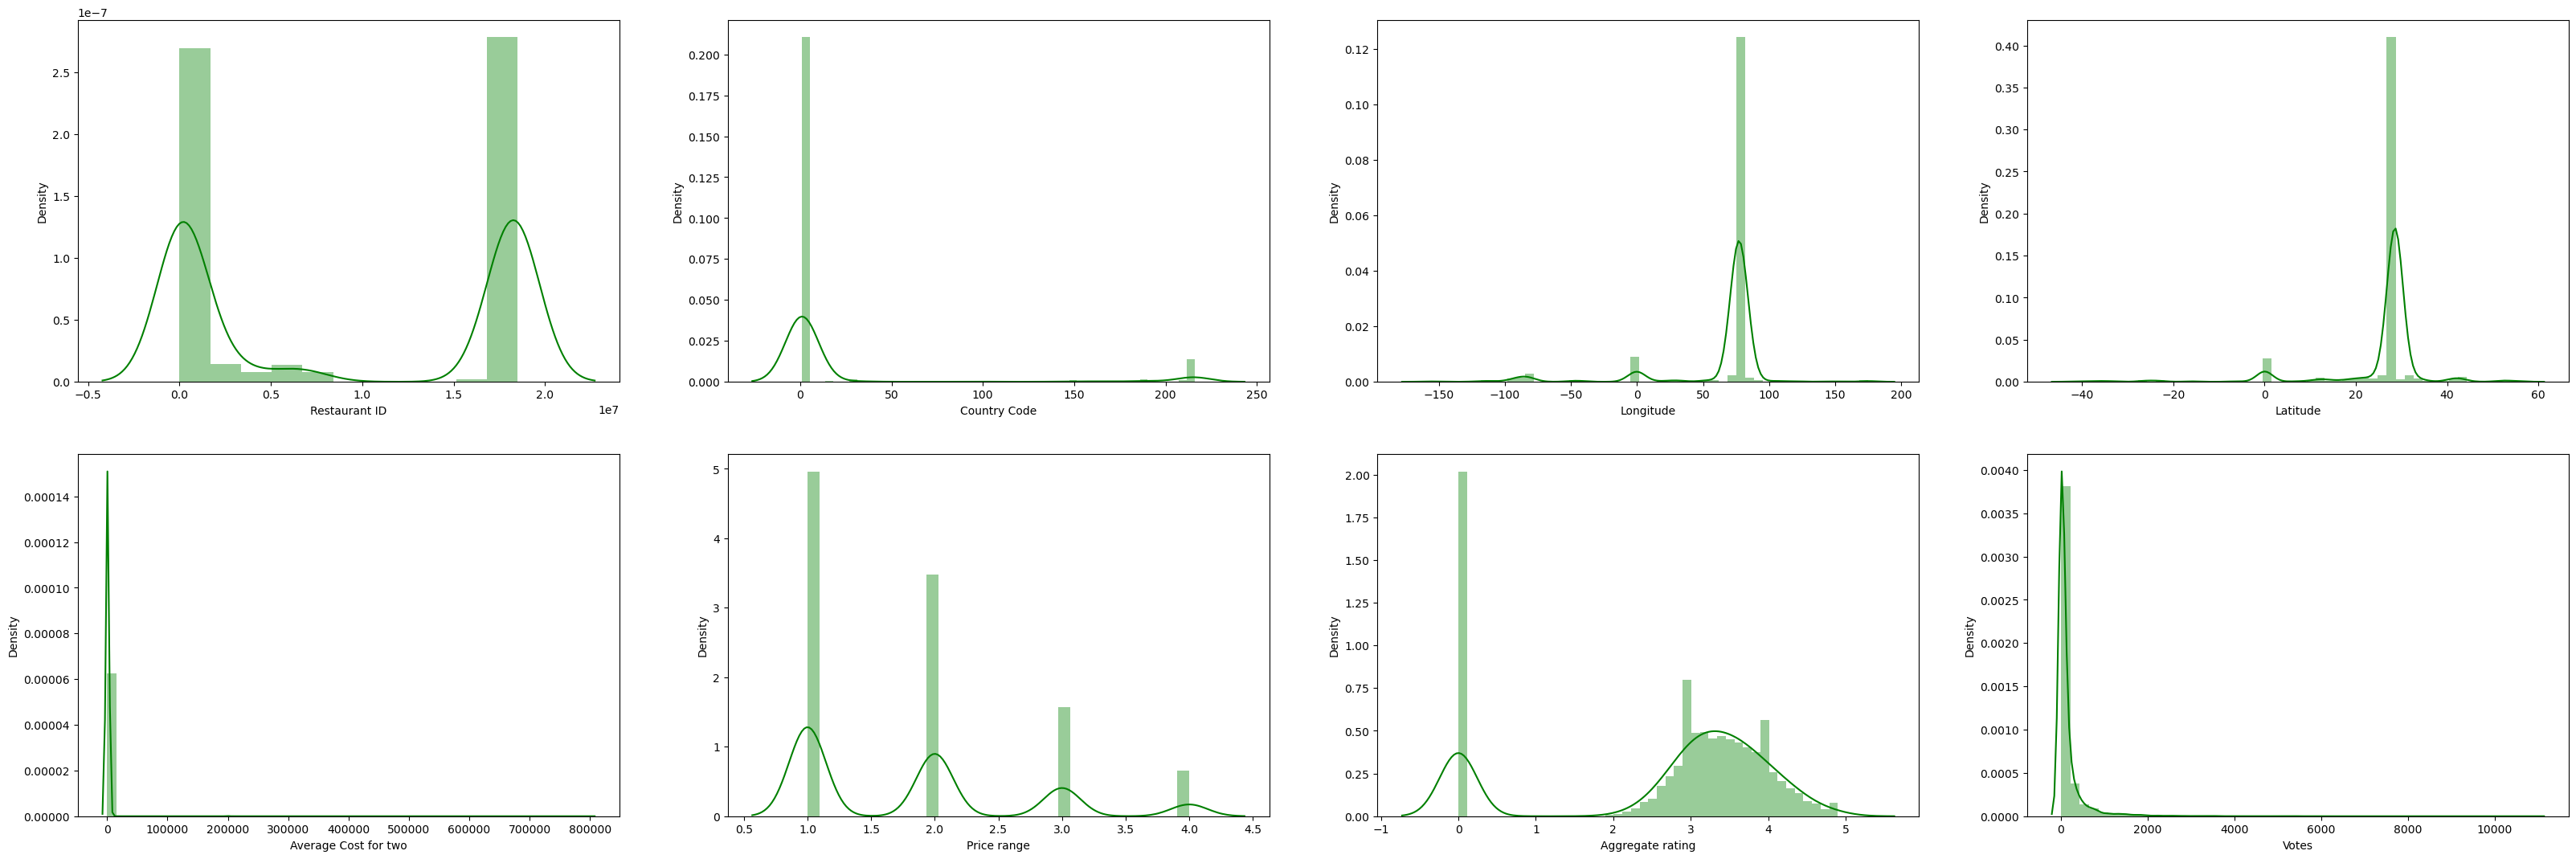

In [34]:
plt.figure(figsize=(40,55))
for i in enumerate(numerical_cols):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

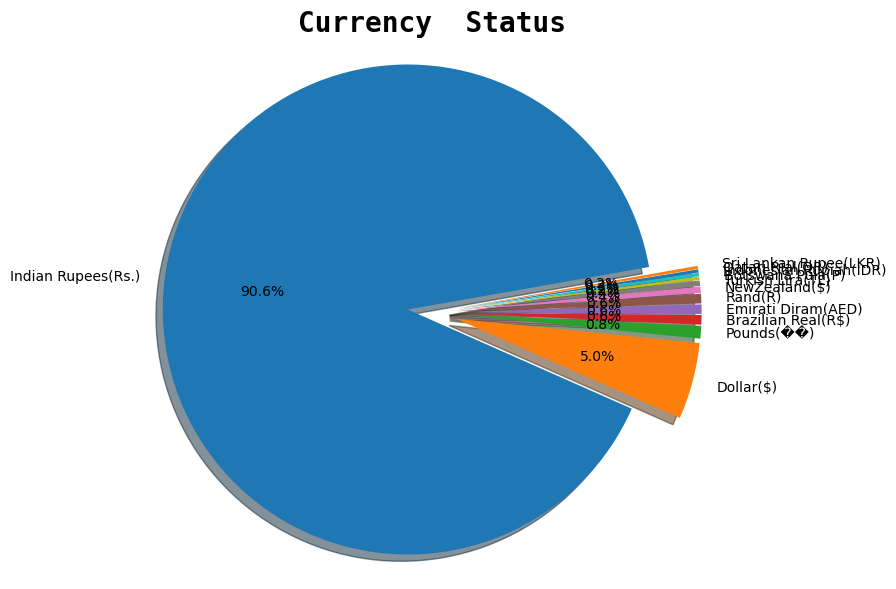

In [35]:
# Creating a pie chart for 'Currency report'
Currency = df['Currency'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))

# Adjust 'explode' based on the number of categories
explode = [0.1] * len(Currency)

plt.pie(Currency.values, labels=Currency.index, startangle=10, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Currency  Status', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.axis('equal')
plt.show()

In [36]:
df=df.replace("?",np.nan)
df=df.fillna(0)

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64


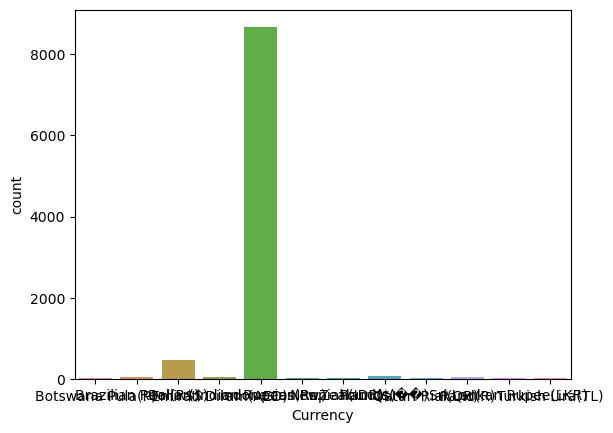

In [37]:
ax=sns.countplot(x="Currency",data=df[categorical_cols])
print(df["Currency"].value_counts())

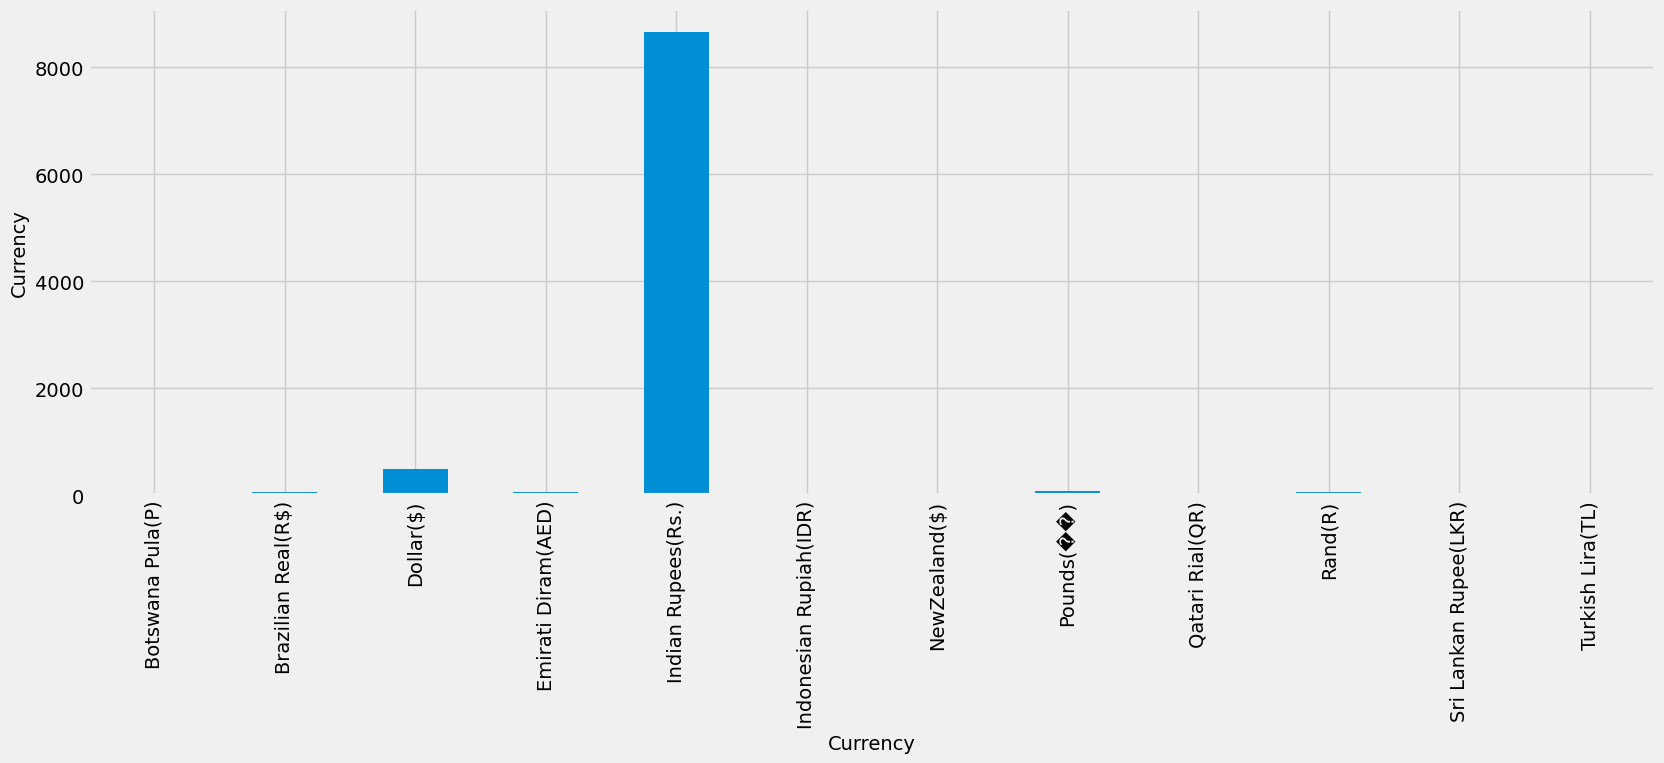

In [38]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Currency').Currency.count().plot.bar(ylim=0)
ax.set_ylabel('Currency')
plt.show()

#from above data we see clearly maximum currency used is indian rupees

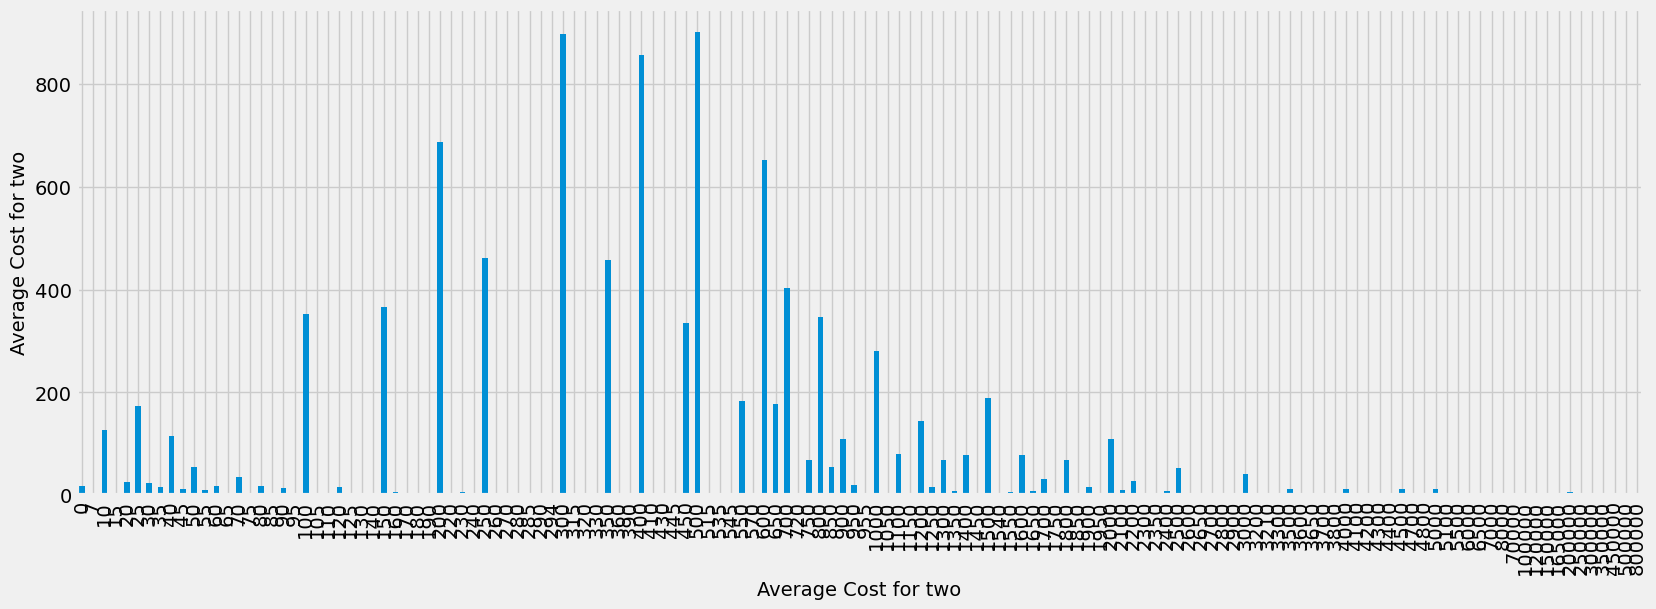

In [39]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Average Cost for two').Currency.count().plot.bar(ylim=0)
ax.set_ylabel('Average Cost for two')
plt.show()

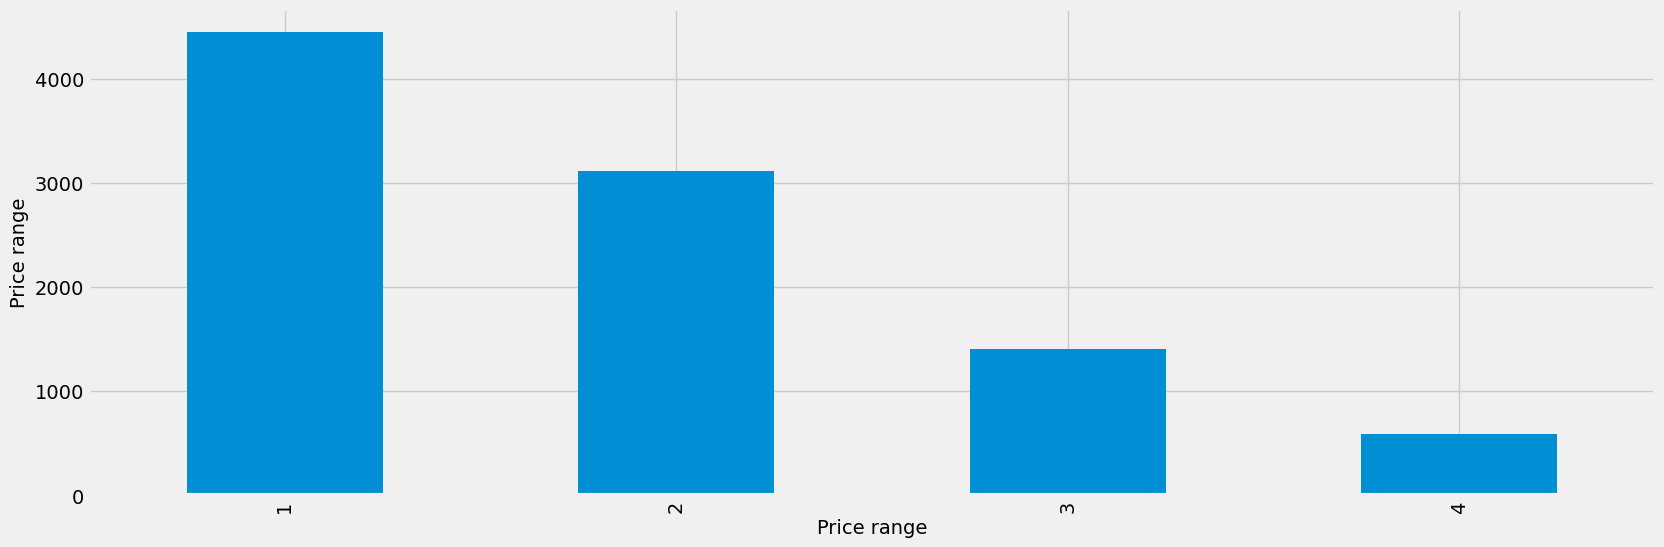

In [40]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Price range').Currency.count().plot.bar(ylim=0)
ax.set_ylabel('Price range')
plt.show()

# price range very from 700 to 4500,on 1 st position 4444 is present which indicates frequency that 4444 comes at only one time 

<Axes: xlabel='Price range', ylabel='Average Cost for two'>

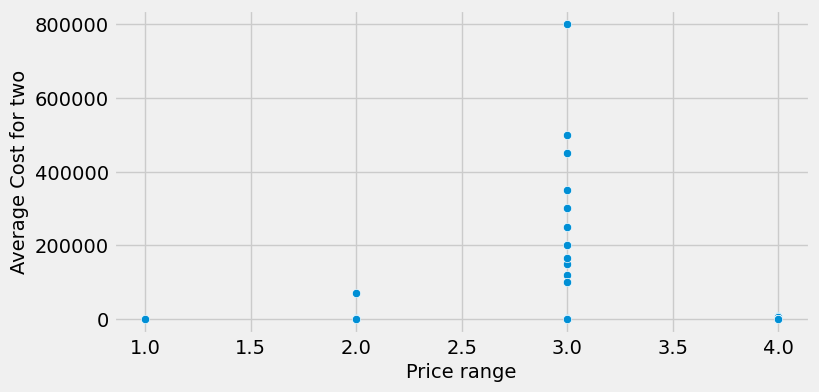

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Price range',y='Average Cost for two',data=df)


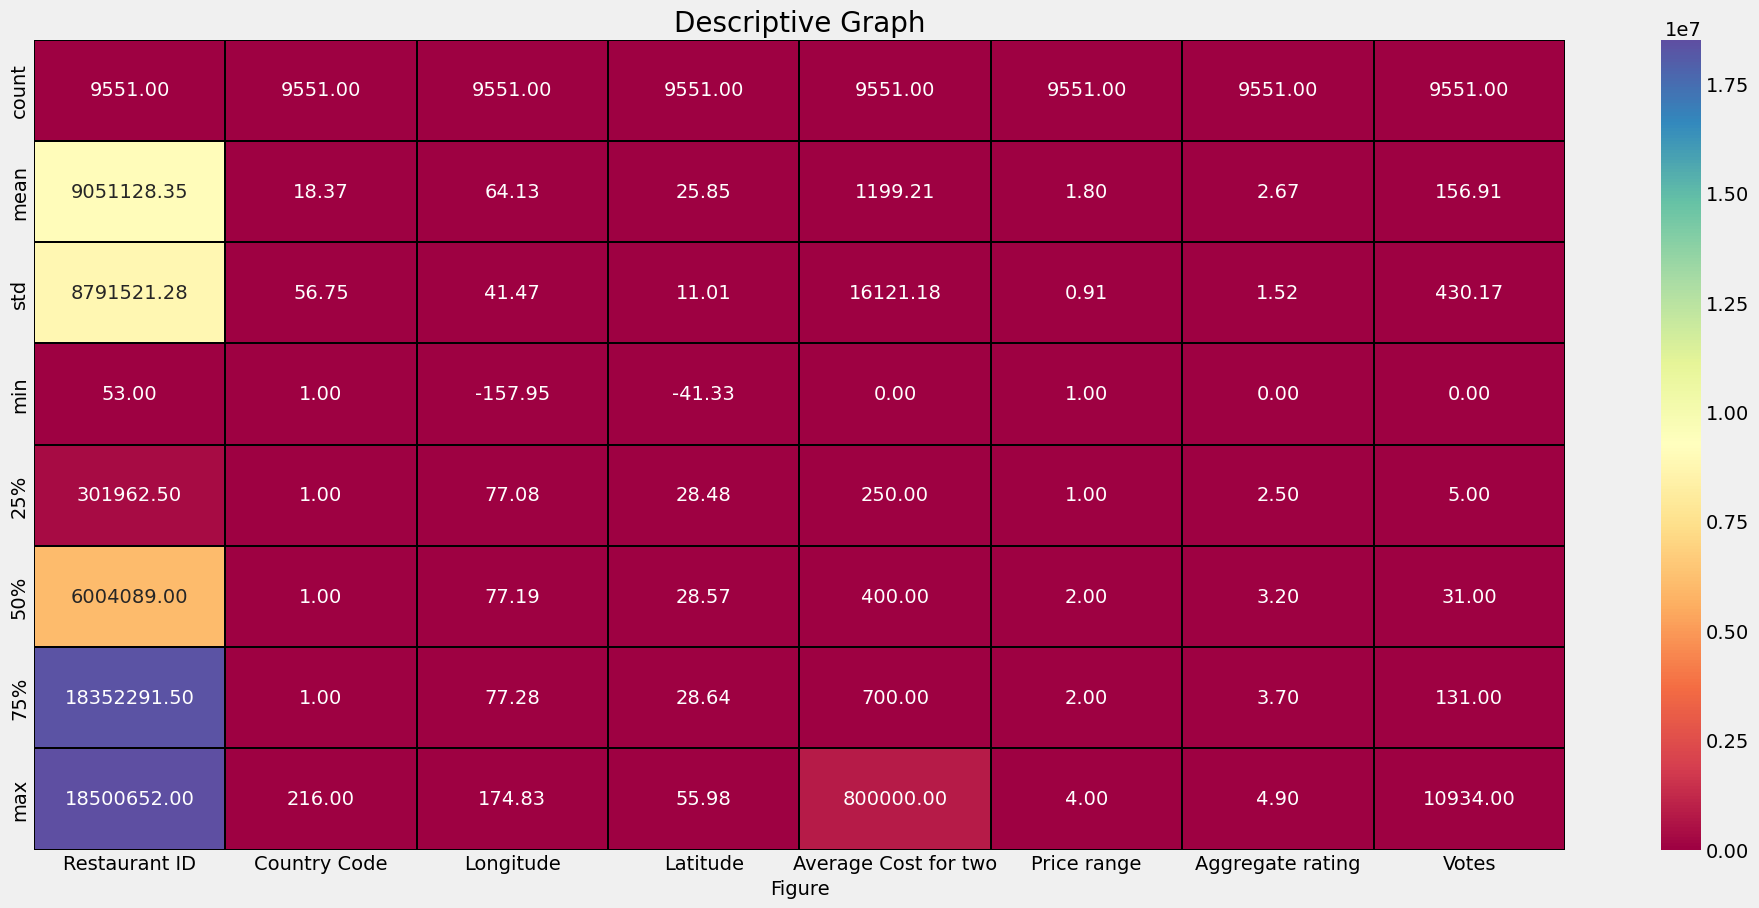

In [42]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

#The purpose of this descriptive graph is to visually represent the summary statistics of the numerical data in the DataFrame df. It provides a comprehensive overview of the distribution, central tendency, and spread of the data.The heatmap format is particularly useful for presenting tabular data with color-coded cells, making it easier to identify patterns and variations across different variables and statistical measures.

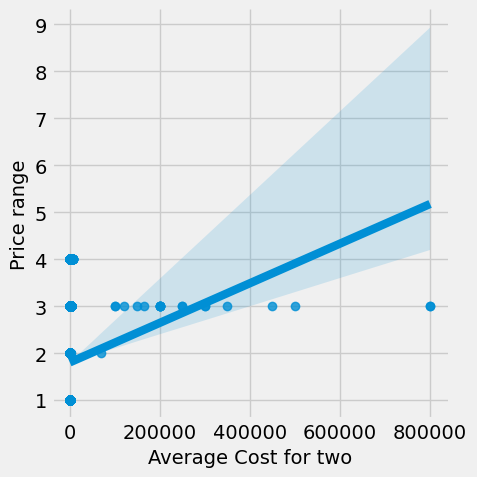

In [43]:
sns.lmplot(x="Average Cost for two",y="Price range",data=df,palette="colorblind")

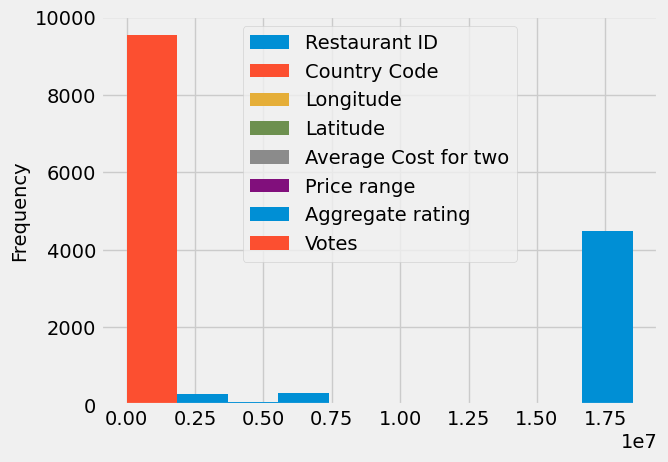

In [44]:
# Generate a Histogram plot for anomaly detection
df.plot(kind='hist')
plt.show()

In [45]:
df["Aggregate rating"].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.4, 2.9, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [46]:
df["Votes"].unique()

array([ 314,  591,  270, ...,  788, 1034,  901], dtype=int64)

In [47]:
df["Rating text"].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [48]:
df["Locality Verbose"].unique()

array(['Century City Mall, Poblacion, Makati City, Makati City',
       'Little Tokyo, Legaspi Village, Makati City, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City',
       ..., 'Ko��uyolu, ��stanbul', 'Kuru�_e��me, ��stanbul',
       'Moda, ��stanbul'], dtype=object)

# unique values in df column 

In [49]:
df["City"].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Athens', 'Augusta', 'Boise', 'Cedar Rapids/Iowa City',
       'Clatskanie', 'Cochrane', 'Columbus', 'Dalton', 'Davenport',
       'Des Moines', 'Dubuque', 'Fernley', 'Gainesville', 'Lakeview',
       'Lincoln', 'Macon', 'Mc Millan', 'Miller', 'Monroe',
       'Ojo Caliente', 'Orlando', 'Pensacola', 'Pocatello', 'Potrero',
       'Princeton', 'Rest of Hawaii', 'Savannah', 'Sioux City',
       'Tampa Bay', 'Valdosta', 'Vernonia', 'Waterloo', 'Weirton',
       'Winchester Bay', 'Armidale', 'Balingup', 'Beechworth',
       'Dicky Beach', 'East Ballina', 'Flaxton', 'Forrest',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lorn', 'Macedon', 'Mayfield', 'Middleton Beach', 'Montville',
       'Palm Cove', 'Paynesville', 'Penola', 'Phillip Isl

In [50]:
df["Currency"].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

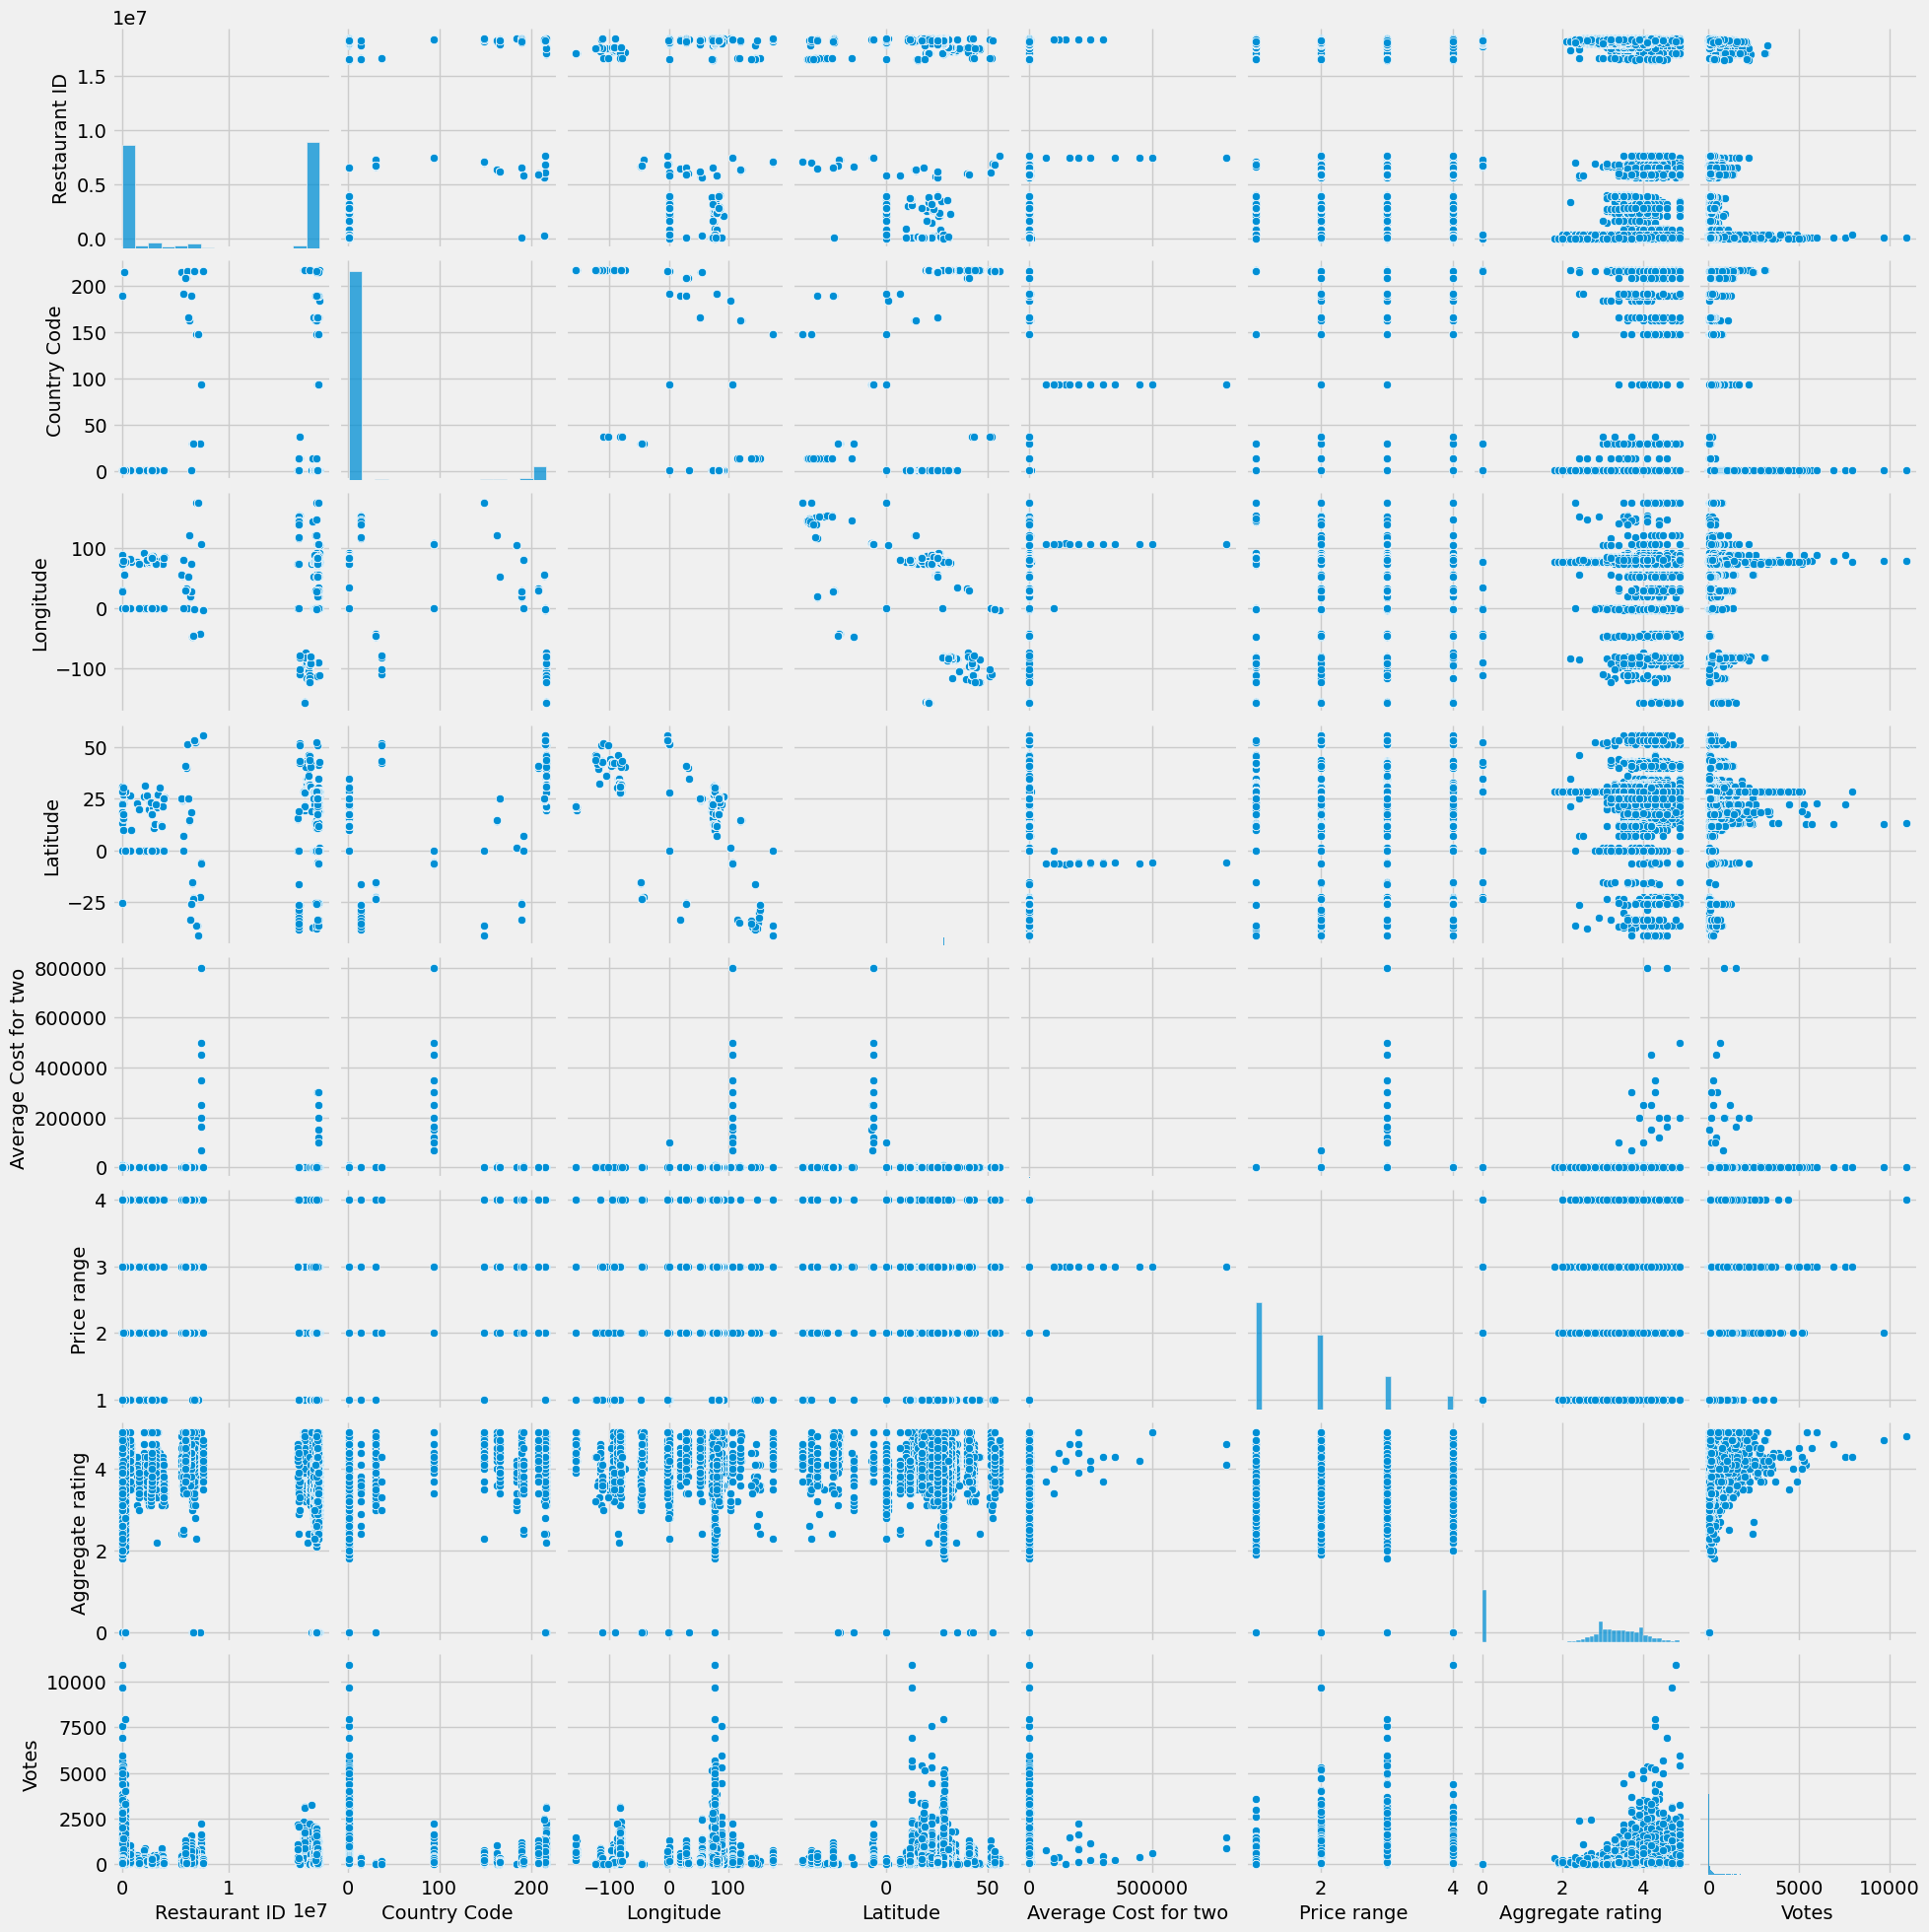

In [51]:
sns.pairplot(df)

In [52]:
def handle(value):
    if isinstance(value, str) and (value == "�" or value == "_"):
        return np.nan
    elif isinstance(value, str) and value.isdigit():
        return float(value)
    else:
        return value

# Apply the handle function element-wise to each element of the DataFrame
df = df.applymap(handle)

In [53]:
def handle(value):
    if isinstance(value, str) and (value == "�" or value == "_"):
        return np.nan
    elif isinstance(value, str) and value.isdigit():
        return float(value)
    else:
        return value

# Apply the handle function element-wise to each element of the DataFrame
df = df.applymap(handle)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [54]:
def handle(value):
    if isinstance(value, str) and (value == "�" or value == "_"):
        return np.nan
    elif isinstance(value, str) and value.isdigit():
        return float(value)
    else:
        return value

# Apply the handle function element-wise to each element of the DataFrame
df["Locality"] = df["Locality"].apply(handle)

In [55]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [56]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [57]:
for i in df[categorical_cols]:
    df[i] = df[i].astype(str)  # Convert all values to strings
    df[i] = le.fit_transform(df[i])  # Encode the column

#LabelEncoder (le) to encode the categories in that column into numerical labels. The result of this transformation is then assigned back to the same column in the DataFrame df, effectively replacing the categorical values with their corresponding numerical labels.

In [58]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,921,...,1,0,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1112,...,1,0,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1672,...,1,0,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1127,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1123,...,1,0,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1814,...,0,0,0,0,3,4.1,1,5,788,11
9547,5908749,1311,208,140,5962,552,558,29.041297,41.009847,1825,...,0,0,0,0,3,4.2,1,5,1034,11
9548,5915807,3069,208,140,5966,554,561,29.034640,41.055817,1111,...,0,0,0,0,4,3.7,5,2,661,11
9549,5916112,513,208,140,5967,554,561,29.036019,41.057979,1658,...,0,0,0,0,4,4.0,1,5,901,11


In [59]:
corrs=df.corr()["Price range"]
columns=corrs[corrs>.001].index
corrs=corrs.filter(columns)
corrs.sort_values(ascending=False)

Price range             1.000000
Has Table booking       0.501925
Aggregate rating        0.437944
Votes                   0.309444
Country Code            0.243327
Country                 0.178035
Rating text             0.164242
Has Online delivery     0.077918
Currency                0.075179
Average Cost for two    0.075083
Restaurant Name         0.061275
Is delivering now       0.010940
Name: Price range, dtype: float64

#The program helps identify which columns in the DataFrame df are most strongly correlated with the "Price range" column
#This line sorts the correlation coefficients in descending order.
#It provides insight into which columns are most strongly correlated with the "Price range" column.

In [60]:
corrs=df.corr()["Currency"]
columns=corrs[corrs>.001].index
corrs=corrs.filter(columns)
corrs.sort_values(ascending=False)

Currency                1.000000
Longitude               0.337334
Price range             0.075179
Cuisines                0.073978
Address                 0.069499
Average Cost for two    0.045615
Locality                0.023718
Locality Verbose        0.022960
Rating text             0.014598
Restaurant Name         0.009669
Has Online delivery     0.006991
Is delivering now       0.001458
Name: Currency, dtype: float64

# Import important libraries 

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [62]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [63]:
x=df.drop(['Average Cost for two'],axis=1)
y=df['Average Cost for two']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

#This Python program performs data preprocessing steps commonly used in machine learning tasks, particularly for supervised learning where you have features (independent variables) and a target variable (dependent variable)

#Here we split the data into train and test,train size is 0.25 and test size is 0.75

In [64]:
print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of x_train :",y_train.shape)
print("Size of x_train :",y_test.shape)

Size of x_train : (7163, 21)
Size of x_test : (2388, 21)
Size of x_train : (7163,)
Size of x_train : (2388,)


In [65]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.31093987,  0.0447056 ,  2.53111053, ..., -0.4654417 ,
         0.36520164,  0.85345723],
       [-0.31245846, -0.22410085,  2.53111053, ..., -0.4654417 ,
         1.0091681 ,  0.85345723],
       [-0.31294588, -0.35290395,  2.53111053, ...,  1.89507002,
         0.26291094,  0.85345723],
       ...,
       [-0.3566488 , -0.27263535,  3.34171786, ...,  0.12468623,
         1.17190331,  2.73895179],
       [-0.3566141 , -1.46546399,  3.34171786, ...,  1.89507002,
         1.72985259,  2.73895179],
       [-0.35532984,  1.67387805,  3.34171786, ...,  1.89507002,
         1.0091681 ,  2.73895179]])

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9324233699460629


In [68]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [69]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9993634598002847


In [70]:
from sklearn.ensemble import RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
print(RFR.score(x_train,y_train))
RFR_PRED=RFR.predict(x_test)

0.9349224030472274


In [71]:
from sklearn.ensemble import AdaBoostRegressor

ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
print(ABR.score(x_train,y_train))
ABR_PRED=ABR.predict(x_test)

0.9388068592299025


In [72]:
from sklearn.neighbors import KNeighborsRegressor 
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
print(KNR.score(x_train,y_train))
KNR_PRED=KNR.predict(x_test)

0.640754850504005


In [73]:
DTR_PRED=DTR.predict(x_test)

In [74]:
x_test

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
4731,3918,7225,1,88,3760,540,546,77.128443,28.651778,1307,...,0,0,0,0,1,2.1,3,4,54,3
1468,18408054,17,1,50,5292,362,368,77.095432,28.460444,1285,...,0,1,0,0,2,4.1,1,5,84,3
9037,309693,346,1,89,1826,1014,1067,77.340449,28.585474,1515,...,0,0,0,0,2,3.2,2,0,36,3
7866,18157386,6954,1,88,4119,1149,1206,77.201128,28.692000,829,...,0,1,0,0,1,4.4,1,5,163,3
5570,18396163,7367,1,88,545,687,698,77.216130,28.712062,1515,...,0,0,0,0,1,3.5,5,2,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,7507,4290,1,50,4315,222,228,77.067644,28.461988,1316,...,1,0,0,0,3,3.8,5,2,91,3
2554,1600029,665,1,87,5918,762,773,73.777340,19.977209,1307,...,0,0,0,0,4,3.8,5,2,164,3
7318,18337895,6092,1,88,4352,1007,1060,77.220552,28.573311,829,...,0,0,0,0,1,0.0,4,3,0,3
8930,18415381,3051,1,89,3276,955,1002,77.384679,28.612597,1307,...,0,0,0,0,1,0.0,4,3,0,3


In [75]:
y_test

4731     350
1468     700
9037     550
7866     200
5570     400
        ... 
1201    1500
2554    1100
7318     300
8930     300
3646    1000
Name: Average Cost for two, Length: 2388, dtype: int64

In [76]:
pred=DTR.predict(x_test)
pred

array([ 350.,  750.,  650., ...,  250.,  200., 1000.])

In [77]:
rf=RandomForestClassifier(max_samples=0.25,random_state=42)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.3195142378559464
Confusion Matrix
 [[ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 36 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  1  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0
          10       0.97      1.00      0.99        36
          20       0.80      0.57      0.67         7
          25       1.00      0.98      0.99        51
          30       0.29      0.29      0.29         7
          35       0.17      0.25      0.20         4
          40       0.61      0.86      0.72        22
          45       0.00      0.00      0.00         6
          50       0.08      0.07      0.07        15
          55       0.00      0.00      0.00         2
          60       0.00      0.00      0.00         3
          65       0.00      0.00      0.00         0
          

# Hyper Parameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
#Number of trees in random forest
n_estimators=[20,60,100,120]

#Number of features to consider at every split
max_features=[0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth=[2,8,None]

#Number of samples
max_samples=[0.5,0.75,1.0]

In [80]:
param_grid={"n_estimators":n_estimators,
           "max_features":max_features,
           "max_depth":max_depth,
           "max_samples":max_samples
           }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [81]:
rf=RandomForestClassifier()

In [82]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=5,verbose=2,
                    n_jobs=-1)

In [83]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [84]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.5,
 'n_estimators': 120}

In [85]:
rf_grid.best_score_

0.35655362231829935

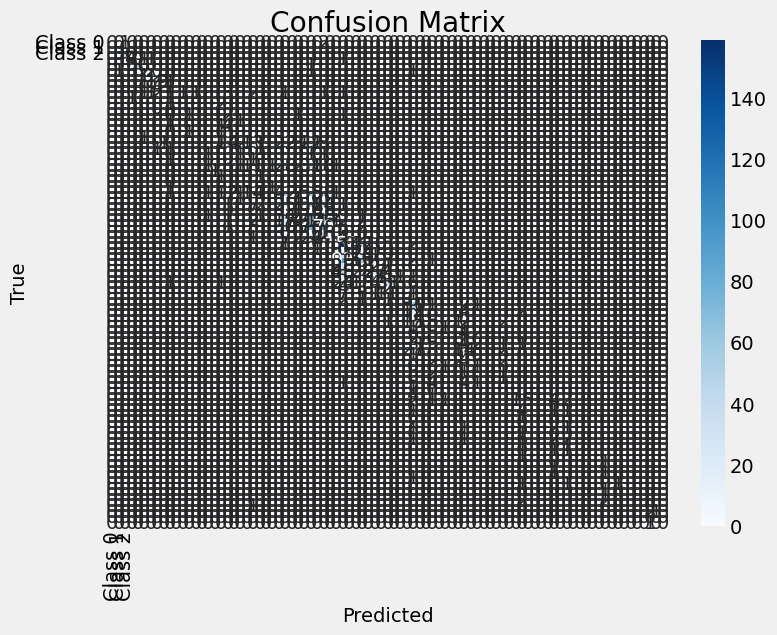

In [86]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test,pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# now we are finding Price Range

In [87]:
x=df.drop(['Price range'],axis=1)
y=df['Price range']

In [88]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(886):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
print("Best score:",maxAcc)
print("Random State:",rs)

Best score: 0.7071129707112971
Random State: 310


In [89]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Accuracy Score: 0.9811715481171548
Confusion Matrix
 [[423   0   0   0]
 [  0 314   1   0]
 [  0   8 149   2]
 [  0   0   7  52]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       423
           2       0.98      1.00      0.99       315
           3       0.95      0.94      0.94       159
           4       0.96      0.88      0.92        59

    accuracy                           0.98       956
   macro avg       0.97      0.95      0.96       956
weighted avg       0.98      0.98      0.98       956



In [90]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.981339418308217


In [91]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [92]:
from sklearn.neighbors import KNeighborsRegressor 
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
print(KNR.score(x_train,y_train))
KNR_PRED=KNR.predict(x_test)

0.6070679149182104


In [93]:
from sklearn.ensemble import AdaBoostRegressor

ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
print(ABR.score(x_train,y_train))
ABR_PRED=ABR.predict(x_test)

0.9101575825633479


In [94]:
DTR_PRED=DTR.predict(x_test)

In [95]:
x_test

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
373,17582498,5344,216,101,2746,572,580,-112.013200,42.620000,154,...,2,0,0,0,0,3.6,5,2,91,14
1931,303848,1034,1,50,8369,934,974,77.059505,28.435018,1349,...,4,0,1,0,0,3.2,2,0,41,3
7381,18424579,3672,1,88,7567,1021,1074,77.099838,28.635971,1307,...,4,0,0,0,0,3.3,2,0,16,3
6854,18303837,1856,1,88,336,876,889,77.200372,28.508203,1627,...,4,0,1,0,0,2.7,2,0,4,3
6177,213,2099,1,88,0,774,785,77.104370,28.676861,1627,...,4,0,0,0,0,3.2,2,0,111,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,18456762,4231,1,88,1441,278,284,77.204109,28.694703,1410,...,4,1,0,0,0,3.7,5,2,49,3
7947,18380891,5492,1,88,4014,1161,1218,77.312065,28.669100,550,...,4,0,1,0,0,3.6,5,2,35,3
4981,1407,2572,1,88,944,595,603,77.226460,28.586370,1514,...,4,0,0,0,0,2.6,2,0,26,3
66,6700475,5899,30,121,5622,441,447,-46.666851,-23.581688,237,...,1,0,0,0,0,4.8,0,1,59,1


In [96]:
y_test

373     1
1931    2
7381    1
6854    2
6177    2
       ..
3315    3
7947    1
4981    2
66      4
3672    2
Name: Price range, Length: 956, dtype: int64

# Save the model in pickle

In [97]:
import pickle

In [98]:
filename="zomato restaurent.pkl"

In [99]:
pickle.dump(rf,open(filename,"wb"))

In [100]:
loaded_model=pickle.load(open("zomato restaurent.pkl","rb"))

In [101]:
result=loaded_model.score(x_test,y_test)

In [102]:
print(result*100)

98.11715481171548


In [103]:
#conclusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Origional"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,946,947,948,949,950,951,952,953,954,955
Predicted,1,2,1,2,2,4,3,2,2,1,...,1,1,1,1,1,3,1,2,4,2
Origional,1,2,1,2,2,4,3,2,2,1,...,1,1,1,1,1,3,1,2,4,2


#From above model performance we clearly see that DecesionTreeRegressor is beat model with accuracy 1